# Employee and Bus Stops

## Context

A company XYZ intends to provide a bus shuttle service that would help its employees commute to the office. The company is based in Mountain View and the shuttle would provide transportation for employees based in San Francisco.

The city of San Francisco has given the company a list of potential bus stops that it may use. However, the company may use no more than 10 of these bus stops for its shuttle service.

The company XYZ is asking you to come up with the **10 most efficient bus stops** that would best serve its employees. Generally speaking, these "efficient" stops would result in the least walking distances between the employees' homes and their respective bus stops. To that end, you were given the following data:
- the list of bus stops provided by the city of San Francisco, `Bus_Stops.csv`
- a list of its employees' home addresses, `Employee_Addresses.csv`

Since trying out all possible combinations of 10 bus stops would take a prohibitively long time, the boss of XYZ has told you that you may simplify the problem and come up with 10 reasonable bus stops that are probably efficient.

## Objectives

- Explore and analyze the data. Provide comments on the outputs of your code and document your code well. 
- Feel free to show off your map visualization skills.
- Write an algorithm that produces the 10 best stops in your opinion. Also, please explain the rationale behind the algorithm. 
- Please the calculate the average walking distance per employee to their respective stops and report it at the end of your work.
- You may code the solution for this task in either Python or R. If you are coding in Python, you may enter your solution at the bottom of this notebook. Otherwise, you may create a new R jupyter notebook and copy this problem description over there. Either way, your solution is to be in the form of a jupyter notebook, regardless of the programming language used.
- Submit your work along with the data files used (`Bus_Stops.csv` & `Employee_Addresses.csv`) in a single ZIP file named as follows: `<FirstName>_<LastName>.zip`

## Evaluation

***Your solution will be evaluated on:***
- ***The soundness of the algorithm used to select the bus stops.***
- ***How much your code is neat, clear and well-documented.***
- ***Quality of narrative and commentary with interesting analyses and visuals.***

## Supplementary Notes

Prior to writing the requested algorithm, you will need to *geocode* the employees' home addresses and bus stops. You may use the [HERE REST APIs](https://developer.here.com/develop/rest-apis) for that purpose. Following are some links to help you in your task:
- To generate a free HereMaps account and an API Key to use for geocoding the addresses:  
    - https://developer.here.com/documentation/identity-access-management/dev_guide/topics/plat-using-apikeys.html
- Sections pertaining to *geocoding* in the documentation:  
    - https://developer.here.com/documentation/geocoder/dev_guide/topics/example-geocoding-free-form.html  
    - https://developer.here.com/documentation/geocoder/dev_guide/topics/example-geocoding-intersection.html
- Programmatically perform GET requests
    - Python: https://realpython.com/python-requests/
    - R: https://www.rdocumentation.org/packages/httr/versions/1.4.4

Note that HereMaps allows a maximum of 1000 requests per day, so it will take more than a single day to do all the geocoding. As a start, you may use all bus stops (~120 stops) and a few hundred employee addresses to start developing your algorithm. Save whatever you geocode so you would not need to geocode it again. Once the geocoding is done for all addresses, run the algorithm one last time and finalize your work.

*Side Note:*  
*The use of HereMaps API for geocoding is just one suggestion. If you are more comfortable using GoogleMaps API or OpenStreetMaps API, then you may use that as well. There are no constraints as to what you may use for geocoding of the addresses.*

<BR>
<BR>
<center><b><u>Finally, note that we will re-run your code (without the geocoding part) to make sure that your work is reproducible.</u></b></center>

<BR>
<center>
<H2>*** GOOD LUCK ***</H2>
</center>

--------

In [1]:
## YOUR WORK GOES HERE!!!

## Setup & Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 

## Data Collection & Web Scraping

In [3]:
# set up my API keys
API_key_1 = "Wm3K_NRdYbmYARufYDkZ2ZBWhoixlqL3aIw8GBOewvg"
API_key_2 = "dBEqSzWQKHSjo8oADZqx6rylshmBaDi56-eUjwV9kpE"

In [4]:
# import Bus Stops dataset
df_bus_stops = pd.read_csv('Bus_Stops.csv')
df_bus_stops.head()

Street_One         Street_Two
0  MISSION ST          ITALY AVE
1  MISSION ST  NEW MONTGOMERY ST
2  MISSION ST            01ST ST
3  MISSION ST            20TH ST
4  MISSION ST         FREMONT ST


**Bus Stops dataset consists of 2 columns (Street_One & Street_Two), which means that each bus stop locates at the intersection of both of them**


In [5]:
df_bus_stops.shape

(119, 2)


**The dataset has 119 bus stops locations**


In [6]:
# import Employee Adresses dataset
df_employee_address = pd.read_csv('Employee_Addresses.csv')
df_employee_address.head()

address  employee_id
0   98 Edinburgh St, San Francisco, CA 94112, USA          206
1        237 Accacia St, Daly City, CA 94014, USA         2081
2    1835 Folsom St, San Francisco, CA 94103, USA          178
3  170 Cambridge St, San Francisco, CA 94134, USA           50
4     16 Roanoke St, San Francisco, CA 94131, USA         1863


**Employee Addresses dataset consists of 2 columns (address & employee_id), which means that each employee locates at a direct free-form address**


In [7]:
df_employee_address.shape

(2191, 2)


**The dataset has 2191 employee locations**


In [8]:
# initialize empty list to sotre the results we get from web scrapping geocodes
bus_stops_geocode = []

In [9]:
for item in df_bus_stops.values:
    # set up the intersetion address of the current bus stop
    street1 = "%20".join(item[0].strip().split())
    street2 = "%20".join(item[1].strip().split())
    address = street1+"%20%40%20"+street2
    
    # define URL to get bus stops geocode by the intersection of 2 streets
    here_url_bs = f"https://geocoder.ls.hereapi.com/6.2/geocode.json?apiKey={API_key_1}&city=San%20Francisco&street={address}"
    
    # scrap the data from HereApi URL here_url_bs
    response = requests.get(here_url_bs)
    if response.status_code  != 200:
        print(item)
        break
    latitude = response.json()["Response"]["View"][0]['Result'][0]['Location']['DisplayPosition']['Latitude']
    longitude = response.json()["Response"]["View"][0]['Result'][0]['Location']['DisplayPosition']['Longitude']
    result = [item[0], item[1],latitude,longitude]
    
    # append the reult in bus_stops_geocode list
    bus_stops_geocode.append(result)
    

In [10]:
# validate the number of bus stops geocode locations we got
len(bus_stops_geocode) # 119

119


**Bus Stops dataset has also 119 records, then we have scrapped geocodes for all bus stops successfully!**


In [11]:
# store our list in a dataframe
df_bus_stops_geocode = pd.DataFrame(bus_stops_geocode, columns = {'Street_One':0, 'Street_Two':1, 'Latitude':2, 'Longitude':3})
df_bus_stops_geocode.head()

Street_One         Street_Two  Latitude  Longitude
0  MISSION ST          ITALY AVE  37.71847 -122.43953
1  MISSION ST  NEW MONTGOMERY ST  37.78745 -122.40050
2  MISSION ST            01ST ST  37.77867 -122.41160
3  MISSION ST            20TH ST  37.75863 -122.41904
4  MISSION ST         FREMONT ST  37.79047 -122.39669

In [12]:
# save df_bus_stops_geocode dataframe to csv file named 'bus_stops_geocode.csv'
df_bus_stops_geocode.to_csv('bus_stops_geocode.csv', index = False)

In [13]:
# initialize empty list to sotre the results we get from web scrapping geocodes
employee_address_geocode = []

In [14]:
for item in df_employee_address.values:
    # set up the free-form address of the current employee
    employee_address = "%20".join(item[0].strip().split())
    
    # define URL to get employee address geocode by free-form address
    here_url_ea = f"https://geocoder.ls.hereapi.com/6.2/geocode.json?apiKey={API_key_2}&searchtext={employee_address}"
    
    # scrap the data from HereApi URL here_url_ea
    response = requests.get(here_url_ea)
    if response.status_code  != 200:
        print(item)
        break
    latitude = response.json()["Response"]["View"][0]['Result'][0]['Location']['DisplayPosition']['Latitude']
    longitude = response.json()["Response"]["View"][0]['Result'][0]['Location']['DisplayPosition']['Longitude']
    result = [item[0], item[1],latitude,longitude]
    
    # append the reult in bus_stops_geocode list
    employee_address_geocode.append(result)
    

In [15]:
# validate the number of bus stops geocode locations we got
len(employee_address_geocode) # 2191

2191

**Employee Adresses dataset has also 119 records, then we have scrapped geocodes for all bus stops successfully!**

In [16]:
# store our list in a dataframe
df_employee_address_geocode = pd.DataFrame(employee_address_geocode, columns = {'Adress':0, 'Employee_Id':1, 'Latitude':2, 'Longitude':3})
df_employee_address_geocode.head()

Adress  Employee_Id   Latitude  \
0   98 Edinburgh St, San Francisco, CA 94112, USA          206  37.727642   
1        237 Accacia St, Daly City, CA 94014, USA         2081  37.704180   
2    1835 Folsom St, San Francisco, CA 94103, USA          178  37.767930   
3  170 Cambridge St, San Francisco, CA 94134, USA           50  37.729660   
4     16 Roanoke St, San Francisco, CA 94131, USA         1863  37.736240   

    Longitude  
0 -122.427315  
1 -122.415820  
2 -122.415100  
3 -122.419720  
4 -122.431320

In [17]:
# save df_employee_address_geocode dataframe to csv file named 'employee_address_geocode.csv
df_employee_address_geocode.to_csv('employee_address_geocode.csv', index = False)

## Data Wrangling & EDA

In [18]:
# Load bus stops geocode dataset
df_bus_stops_geocode = pd.read_csv('bus_stops_geocode.csv')
df_bus_stops_geocode.head()

Street_One         Street_Two  Latitude  Longitude
0  MISSION ST          ITALY AVE  37.71847 -122.43953
1  MISSION ST  NEW MONTGOMERY ST  37.78745 -122.40050
2  MISSION ST            01ST ST  37.77867 -122.41160
3  MISSION ST            20TH ST  37.75863 -122.41904
4  MISSION ST         FREMONT ST  37.79047 -122.39669

In [19]:
df_bus_stops_geocode.shape

(119, 4)


**_Bus stops geocode dataset has 119 bus stops addresses with their latitudes and longitudes coordinates_**


In [20]:
# Load employee adress geocode dataset
df_employee_address_geocode = pd.read_csv('employee_address_geocode.csv')
df_employee_address_geocode.head()

Adress  Employee_Id   Latitude  \
0   98 Edinburgh St, San Francisco, CA 94112, USA          206  37.727642   
1        237 Accacia St, Daly City, CA 94014, USA         2081  37.704180   
2    1835 Folsom St, San Francisco, CA 94103, USA          178  37.767930   
3  170 Cambridge St, San Francisco, CA 94134, USA           50  37.729660   
4     16 Roanoke St, San Francisco, CA 94131, USA         1863  37.736240   

    Longitude  
0 -122.427315  
1 -122.415820  
2 -122.415100  
3 -122.419720  
4 -122.431320

In [21]:
df_employee_address_geocode.shape

(2191, 4)


**_Employee adress geocode dataset has 2191 addresses with their latitudes and longitudes coordinates_**


### Visualize Bus Stops on San Francisco Map

In [22]:
import folium

In [23]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [24]:
# create base map for San Francisco city
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# create list of latitudes, longitudes and bus stop labels
bus_latitudes = list(df_bus_stops_geocode.Latitude)
bus_longitudes = list(df_bus_stops_geocode.Longitude)
df_bus_stops_geocode['labels'] = df_bus_stops_geocode.Street_One + ' & '+df_bus_stops_geocode.Street_Two 
bus_labels = list(df_bus_stops_geocode.labels)

# loop and add each bus stop circle marker & popup marker to the incidents feature group
for lat, lng, label in zip(bus_latitudes, bus_longitudes, bus_labels):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    # add popup marker to each bus stop
    folium.Marker([lat, lng], popup=label.title()).add_to(sanfran_map)    

# add incidents to map
sanfran_map.add_child(incidents)


**_From that map we can see that all bus stops locate at the same street which is MISSION ST or Street_One in the dataset_**

**_Each bus stop point has a popup message with bus stop address_**


## Model Building

### Solution Idea

_Creating 10 groups (Clusters) of employees and get the least average distance between each cluster and bus stops_

In [25]:
# Prepare the data of employee addresses using latitudes and longitudes
X = df_employee_address_geocode[['Latitude', 'Longitude']]
X[:5]

Latitude   Longitude
0  37.727642 -122.427315
1  37.704180 -122.415820
2  37.767930 -122.415100
3  37.729660 -122.419720
4  37.736240 -122.431320

In [26]:
# import KMeans library
from sklearn.cluster import KMeans

# Build and Train the model
kmeans = KMeans(n_clusters=10, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=42)


**_Model is built successfully with 10 clusters of employee addresses_**


In [27]:
# Print each center latitude and longitude of each employee cluster
kmeans.cluster_centers_

array([[  37.7168983 , -122.43526973],
       [  37.76996697, -122.41340262],
       [  37.73507607, -122.40388122],
       [  37.70958547, -122.4127355 ],
       [  37.7342423 , -122.4272761 ],
       [  37.79249368, -122.44353091],
       [  37.70654078, -122.44914539],
       [  37.7679947 , -122.43002128],
       [  37.78502999, -122.39560244],
       [  37.74487769, -122.44827285]])

### Visualize Employees Cluster adresses on San Francisco Map

In [28]:
# loop and add each cluster circle marker & popup marker to the incidents feature group
for label, location in enumerate(kmeans.cluster_centers_):
    incidents.add_child(
        folium.CircleMarker(
            location,
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
    # add popup marker to each employees clusters
    folium.Marker(location,icon=folium.Icon(color='red'), popup= 'Employees Center Point: '+str( label)).add_to(sanfran_map)    

# add incidents to map
sanfran_map.add_child(incidents)


**_There are now 10 center points for employees clusters_**

In [29]:
# import geopy library to calculate the distance between 2 coords on the map
import geopy.distance

# initialize empty list to sotre the 10 most efficient bus stops with their coordinates 
# and their respective employees group coordinates with the average distance between them
best10_bus_stop = []

# loop through each cluster and find the closest bus stop to it
for coords in kmeans.cluster_centers_:
    lowest_distance = 0
    bus_label = ""
    best_coords = []
    
    # loop through each bus stop and check the distance between it and the current cluster
    for lat, lng, label in zip(bus_latitudes, bus_longitudes, bus_labels):
        bus_coords = [lat,lng]
        current_distance = geopy.distance.geodesic(coords, bus_coords).km
        if lowest_distance != 0:
            lowest_distance = min(current_distance, lowest_distance)
            if lowest_distance == current_distance:
                best_coords = bus_coords
                bus_label = label
        else:
            lowest_distance = current_distance
            best_coords = bus_coords
            bus_label = label
    
    # Store the result in best10_bus_stop list
    best10_bus_stop.append([list(coords), bus_label, best_coords, np.round(lowest_distance,3)])

In [30]:
# store best10_bus_stop list in a dataframe df_best10_bus_stop
df_best10_bus_stop = pd.DataFrame(best10_bus_stop, columns = {'Centers_Coords':0, "Bus_Stops":1, "Bus_Coords":2, "Average_Distance":3})
df_best10_bus_stop

Centers_Coords                  Bus_Stops  \
0   [37.71689830479705, -122.43526973468634]     MISSION ST & ITALY AVE   
1    [37.7699669720524, -122.41340262161572]       MISSION ST & 12TH ST   
2  [37.735076067391304, -122.40388121811594]       MISSION ST & 30TH ST   
3  [37.709585466836735, -122.41273550255102]    MISSION ST & RUSSIA AVE   
4   [37.73424229692833, -122.42727609880546]   MISSION ST & BOSWORTH ST   
5   [37.79249367978142, -122.44353090874317]  MISSION ST & LAFAYETTE ST   
6   [37.70654078317757, -122.44914539252336]  MISSION ST & LAWRENCE AVE   
7   [37.76799469552239, -122.43002127761194]       MISSION ST & 14TH ST   
8   [37.785029988372095, -122.3956024372093]    MISSION ST & ANTHONY ST   
9   [37.74487769466667, -122.44827285466667]    MISSION ST & RANDALL ST   

               Bus_Coords  Average_Distance  
0  [37.71847, -122.43953]             0.414  
1  [37.77122, -122.41571]             0.246  
2  [37.74239, -122.42196]             1.788  
3  [37.72157, -122.43718]             2.533  
4  [37.73367, -122.42644]             0.097  
5  [37.77352, -122.41808]             3.076  
6  [37.70942, -122.45088]             0.354  
7  [37.76829, -122.41997]             0.886  
8  [37.78838, -122.39933]             0.496  
9   [37.7398, -122.42362]             2.245

**_The 10 most efficient bus stops respectively with their average distance per employee are as follows_**
1. MISSION ST & ITALY AVE, 0.414 KM
2. MISSION ST & 12TH ST, 0.246 KM
3. MISSION ST & 30TH ST, 1.788 KM
4. MISSION ST & RUSSIA AVE, 2.533 KM
5. MISSION ST & BOSWORTH ST, 0.097 KM
6. MISSION ST & LAFAYETTE ST, 3.076 KM
7. MISSION ST & LAWRENCE AVE, 0.354 KM
8. MISSION ST & 14TH ST, 0.886 KM
9. MISSION ST & ANTHONY ST, 0.496 KM
10. MISSION ST & RANDALL ST, 2.245 KM


In [31]:
# print the total mean distance
round(df_best10_bus_stop.Average_Distance.mean(),4)

1.2135

**_The total average walking distance per each employee to his bus stop is 1.2135 KM_**

### Visualize The Average Distance on San Francisco Map

By plotting a line between Employee Clusters and their respective Bus Stops

In [32]:
# loop and add line shows each average distacne between employees clusters and their bus stops
for center_location, label, bus_location, distance in df_best10_bus_stop.values: 
    popup_message =  'Average Distance Per Employee To Their Respective Bus Stop {} = {} KM'.format(label.title(),distance)
    folium.PolyLine([center_location, bus_location], popup=popup_message).add_to(sanfran_map)

# display San Francisco Map
sanfran_map


**_San Francisco Map shows straight lines between each center point for each cluster and their bus stops_**

**_When you click on a line of a cluster it shows a popup message that tells you the average distance between that cluster and its bus stop_**


## Advanced Work

_Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster._

_A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases._

In [33]:
# Build 10 models and Calcutlate the inertia for each one
inertia = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

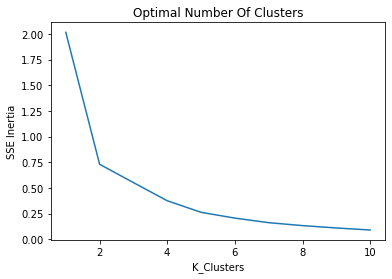

In [34]:
# plot the itertia for each model with the number of clusters
plt.title('Optimal Number Of Clusters')
plt.xlabel('K_Clusters')
plt.ylabel('SSE Inertia')
plt.plot(range(1,11), inertia)
plt.show();

_To find the optimal number of clusters for our dataset, we use the Elbow method which is the point where the decrease in inertia begins to slow. K=5 is the “elbow” of this graph._

In [35]:
# Build and Train the model with the optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [36]:
# initialize empty list to sotre the 5 most efficient bus stops with their coordinates 
# and their respective employees group coordinates with the average distance between them
adv_best5_bus_stop = []

# loop through each cluster and find the closest bus stop to it
for adv_coords in kmeans.cluster_centers_:
    adv_lowest_distance = 0
    adv_bus_label = ""
    adv_best_coords = []
    
    # loop through each bus stop and check the distance between it and the current cluster
    for lat, lng, label in zip(bus_latitudes, bus_longitudes, bus_labels):
        adv_bus_coords = [lat,lng]
        adv_current_distance = geopy.distance.geodesic(adv_coords, adv_bus_coords).km
        if adv_lowest_distance != 0:
            adv_lowest_distance = min(adv_current_distance, adv_lowest_distance)
            if adv_lowest_distance == adv_current_distance:
                adv_best_coords = adv_bus_coords
                adv_bus_label = label
        else:
            adv_lowest_distance = adv_current_distance
            adv_best_coords = adv_bus_coords
            adv_bus_label = label
    
    # Store the result in adv_best5_bus_stop list
    adv_best5_bus_stop.append([list(adv_coords), adv_bus_label, adv_best_coords, np.round(adv_lowest_distance,3)])

In [37]:
# store best10_bus_stop list in a dataframe df_adv_best5_bus_stop
df_adv_best5_bus_stop = pd.DataFrame(adv_best5_bus_stop, columns = {'Centers_Coords':0, "Bus_Stops":1, "Bus_Coords":2, "Average_Distance":3})
df_adv_best5_bus_stop

Centers_Coords                  Bus_Stops  \
0    [37.7705707903937, -122.41570418377952]       MISSION ST & 12TH ST   
1    [37.72144952162162, -122.4110152002457]   MISSION ST & TRUMBULL ST   
2   [37.79249367978142, -122.44353090874317]  MISSION ST & LAFAYETTE ST   
3  [37.713541027747254, -122.43949966785715]       MISSION ST & POPE ST   
4  [37.736165244019936, -122.43088307990033]   MISSION ST & BOSWORTH ST   

               Bus_Coords  Average_Distance  
0  [37.77122, -122.41571]             0.072  
1  [37.73078, -122.42925]             1.912  
2  [37.77352, -122.41808]             3.076  
3  [37.71543, -122.44183]             0.294  
4  [37.73367, -122.42644]             0.480

In [38]:
# print the total mean distance
round(df_adv_best5_bus_stop.Average_Distance.mean(),4)

1.1668

**_The total average walking distance per each employee to his bus stop when using only 5 bus stops is 1.1668 KM,  
which is less than the total average walking distance per each employee to his bus stop when using 10 bus stops 1.2135 KM_**

## Advanced Cluster Map For Employees

_Below is an advanced cluster map that you can use to explore the art of clustering employee on a map_

In [39]:
from folium import plugins
cluster_sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

bus_latitudes = list(df_bus_stops_geocode.Latitude)
bus_longitudes = list(df_bus_stops_geocode.Longitude)
df_bus_stops_geocode['labels'] = df_bus_stops_geocode.Street_One + ' & '+df_bus_stops_geocode.Street_Two 
bus_labels = list(df_bus_stops_geocode.labels)

# loop and add each to the incidents feature group
for lat, lng, label in zip(bus_latitudes, bus_longitudes, bus_labels):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    folium.Marker([lat, lng], popup=label.title()).add_to(cluster_sanfran_map)   

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(cluster_sanfran_map)

emp_latitudes = list(df_employee_address_geocode.Latitude)
emp_longitudes = list(df_employee_address_geocode.Longitude)
emp_labels = list(df_employee_address_geocode.Employee_Id)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label in zip(emp_latitudes, emp_longitudes, emp_labels):
    folium.Marker(
        location=[lat, lng],
        icon=folium.Icon(color='red'),
        popup='Employee Id: '+str(label)
    ).add_to(incidents)

# display map
cluster_sanfran_map